In [1]:
from pathlib import Path
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter
from matplotlib.patches import Patch


In [2]:
# Define paths
PROCESSED_DIR = Path("../input/processed")
SHAPEFILE_DIR = Path("../input/raw/shapefiles")
FIGURES_DIR = Path("../output/figures")
FIGURE_DPI = 150
FIGURES_DIR.mkdir(parents=True, exist_ok=True)

# We will exclude airport zones, tourist zones such as parks with near-zero residents and the zones with no geographic assignment
EXCLUDED_ZONES = [1, 8, 43, 100, 104, 105, 111, 128, 132, 138, 153, 264, 265]

# Read aggregated data (zone x hour x is_weekend level)
df_aggregated = pd.read_parquet(PROCESSED_DIR / "aggregated_data_time_zone.parquet")
df_aggregated = df_aggregated[~df_aggregated['pulocationid'].isin(EXCLUDED_ZONES)].copy()
print(f"df_aggregated shape: {df_aggregated.shape}")
print(f"Columns: {list(df_aggregated.columns)}")
df_aggregated.head()


df_aggregated shape: (27662, 86)
Columns: ['pulocationid', 'pickup_hour', 'is_weekend', 'trip_count', 'avg_fare', 'median_fare', 'avg_trip_distance', 'avg_trip_minutes', 'total_fare', 'total_miles', 'avg_wait_time', 'std_wait_time', 'fare_per_mile', 'vehicle_type', 'borough', 'zone', 'service_zone', 'total_population', 'population_below_poverty', 'hh_income_under_10k', 'hh_income_10k_to_15k', 'hh_income_15k_to_20k', 'hh_income_20k_to_25k', 'hh_income_25k_to_30k', 'hh_income_30k_to_35k', 'hh_income_35k_to_40k', 'hh_income_40k_to_45k', 'hh_income_45k_to_50k', 'hh_income_50k_to_60k', 'hh_income_60k_to_75k', 'hh_income_75k_to_100k', 'hh_income_100k_to_125k', 'hh_income_125k_to_150k', 'hh_income_150k_to_200k', 'hh_income_200k_plus', 'total_households', 'households_no_vehicle', 'commuters_total', 'commute_car_truck_van', 'commute_drove_alone', 'commute_carpooled', 'commute_public_transit', 'commute_taxi', 'commute_motorcycle', 'commute_bicycle', 'commute_walked', 'commute_other', 'commute_wo

,pulocationid,pickup_hour,is_weekend,trip_count,avg_fare,median_fare,avg_trip_distance,avg_trip_minutes,total_fare,total_miles,...,ethnicity_hispanic_latino,population_with_disability,trips_per_capita,poverty_rate,pct_no_vehicle,pct_minority,pct_white,pct_public_transit,pct_low_income,pct_high_income
36,2,0,0,1,48.5,48.5,9.91,21.616667,48.5,9.91,...,4.0,45.0,0.022222,0.088889,0.111111,0.111111,0.8,0.157895,0.055556,0.388889
37,2,0,1,1,70.0,70.0,22.63,39.250000,70.0,22.63,...,4.0,45.0,0.022222,0.088889,0.111111,0.111111,0.8,0.157895,0.055556,0.388889
38,2,1,0,1,78.6,78.6,21.12,32.833333,78.6,21.12,...,4.0,45.0,0.022222,0.088889,0.111111,0.111111,0.8,0.157895,0.055556,0.388889
39,2,5,0,1,36.6,36.6,9.60,16.533333,36.6,9.60,...,4.0,45.0,0.022222,0.088889,0.111111,0.111111,0.8,0.157895,0.055556,0.388889
40,2,6,0,1,74.4,74.4,22.74,53.666667,74.4,22.74,...,4.0,45.0,0.022222,0.088889,0.111111,0.111111,0.8,0.157895,0.055556,0.388889


In [3]:
# Read aggregated data (zone level only)
df_aggregated_zone = pd.read_parquet(PROCESSED_DIR / "aggregated_data_zone.parquet")
df_aggregated_zone = df_aggregated_zone[~df_aggregated_zone['pulocationid'].isin(EXCLUDED_ZONES)].copy()
print(f"df_aggregated_zone shape: {df_aggregated_zone.shape}")
print(f"Columns: {list(df_aggregated_zone.columns)}")
df_aggregated_zone.head()


df_aggregated_zone shape: (733, 84)
Columns: ['pulocationid', 'trip_count', 'avg_fare', 'median_fare', 'avg_trip_distance', 'avg_trip_minutes', 'total_fare', 'total_miles', 'avg_wait_time', 'std_wait_time', 'fare_per_mile', 'vehicle_type', 'borough', 'zone', 'service_zone', 'total_population', 'population_below_poverty', 'hh_income_under_10k', 'hh_income_10k_to_15k', 'hh_income_15k_to_20k', 'hh_income_20k_to_25k', 'hh_income_25k_to_30k', 'hh_income_30k_to_35k', 'hh_income_35k_to_40k', 'hh_income_40k_to_45k', 'hh_income_45k_to_50k', 'hh_income_50k_to_60k', 'hh_income_60k_to_75k', 'hh_income_75k_to_100k', 'hh_income_100k_to_125k', 'hh_income_125k_to_150k', 'hh_income_150k_to_200k', 'hh_income_200k_plus', 'total_households', 'households_no_vehicle', 'commuters_total', 'commute_car_truck_van', 'commute_drove_alone', 'commute_carpooled', 'commute_public_transit', 'commute_taxi', 'commute_motorcycle', 'commute_bicycle', 'commute_walked', 'commute_other', 'commute_work_from_home', 'travel_tim

,pulocationid,trip_count,avg_fare,median_fare,avg_trip_distance,avg_trip_minutes,total_fare,total_miles,avg_wait_time,std_wait_time,...,ethnicity_hispanic_latino,population_with_disability,trips_per_capita,poverty_rate,pct_no_vehicle,pct_minority,pct_white,pct_public_transit,pct_low_income,pct_high_income
1,2,14,51.946429,53.75,14.197143,30.564286,727.25,198.76,NaN,NaN,...,4.0,45.0,0.311111,0.088889,0.111111,0.111111,0.800000,0.157895,0.055556,0.388889
2,3,500,35.980780,36.50,9.242260,43.164167,17990.39,4621.13,NaN,NaN,...,10790.0,28445.0,0.016650,0.117849,0.268746,0.695771,0.166067,0.360546,0.152387,0.239277
3,4,20292,17.499698,15.60,2.928168,16.181122,355103.87,59418.39,NaN,NaN,...,7036.0,19687.0,1.029789,0.244303,0.821111,0.474803,0.324029,0.449475,0.331549,0.225886
4,6,165,11.293273,0.01,7.442242,27.574747,1863.39,1227.97,NaN,NaN,...,2265.0,14278.0,0.011493,0.102744,0.184328,0.206952,0.555865,0.328286,0.159051,0.260354
5,7,7730,22.429423,19.80,4.231356,20.274053,173379.44,32708.38,NaN,NaN,...,20482.0,76890.0,0.100502,0.117521,0.656128,0.312089,0.485776,0.574999,0.138025,0.266669


# Data Analysis

## Aggregating by Zone and Vehicle Type

**Note:** Zones in `EXCLUDED_ZONES` are excluded because this analysis focuses on identifying service equity gaps, and those zones have no resident population.


In [4]:
def format_k(x, _):
    if x >= 1_000:
        return f"{x/1_000:.0f}K"
    return f"{int(x)}"

def format_m(x, _):
    if x >= 1_000_000:
        val = x / 1_000_000
        return f"{int(val)}M" if val.is_integer() else f"{val:.1f}M"
    return f"{int(x):,}"

# Set style
sns.set_style("whitegrid")

# Color mapping for vehicle types
VEHICLE_COLORS = {
    'yellow': '#FFD700',  # Solid yellow
    'green': '#228B22',   # Solid green
    'hvfhv': '#000000'    # Solid black
}

def plot_choropleth_with_exclusions(gdf, column, title, legend_label, filename, cmap='RdYlBu_r', excluded_ids=None):
    excluded_ids = excluded_ids or []
    excluded_mask = gdf['pulocationid'].isin(excluded_ids)
    gdf_plot = gdf[~excluded_mask]
    gdf_excluded = gdf[excluded_mask]

    fig, ax = plt.subplots(figsize=(10, 10))
    gdf_plot.plot(
        column=column,
        ax=ax,
        cmap=cmap,
        linewidth=0.2,
        edgecolor='white',
        legend=True,
        legend_kwds={'label': legend_label, 'shrink': 0.6}
    )

    if not gdf_excluded.empty:
        gdf_excluded.plot(
            ax=ax,
            color='#d9d9d9',
            edgecolor='white',
            linewidth=0.2,
            hatch='///'
        )
        excluded_patch = Patch(facecolor='#d9d9d9', hatch='///', label='Excluded zones')
        ax.legend(handles=[excluded_patch], loc='lower left', frameon=True)

    ax.set_title(title)
    ax.axis('off')
    plt.tight_layout()
    fig.savefig(filename, dpi=FIGURE_DPI, bbox_inches='tight')
    plt.show()


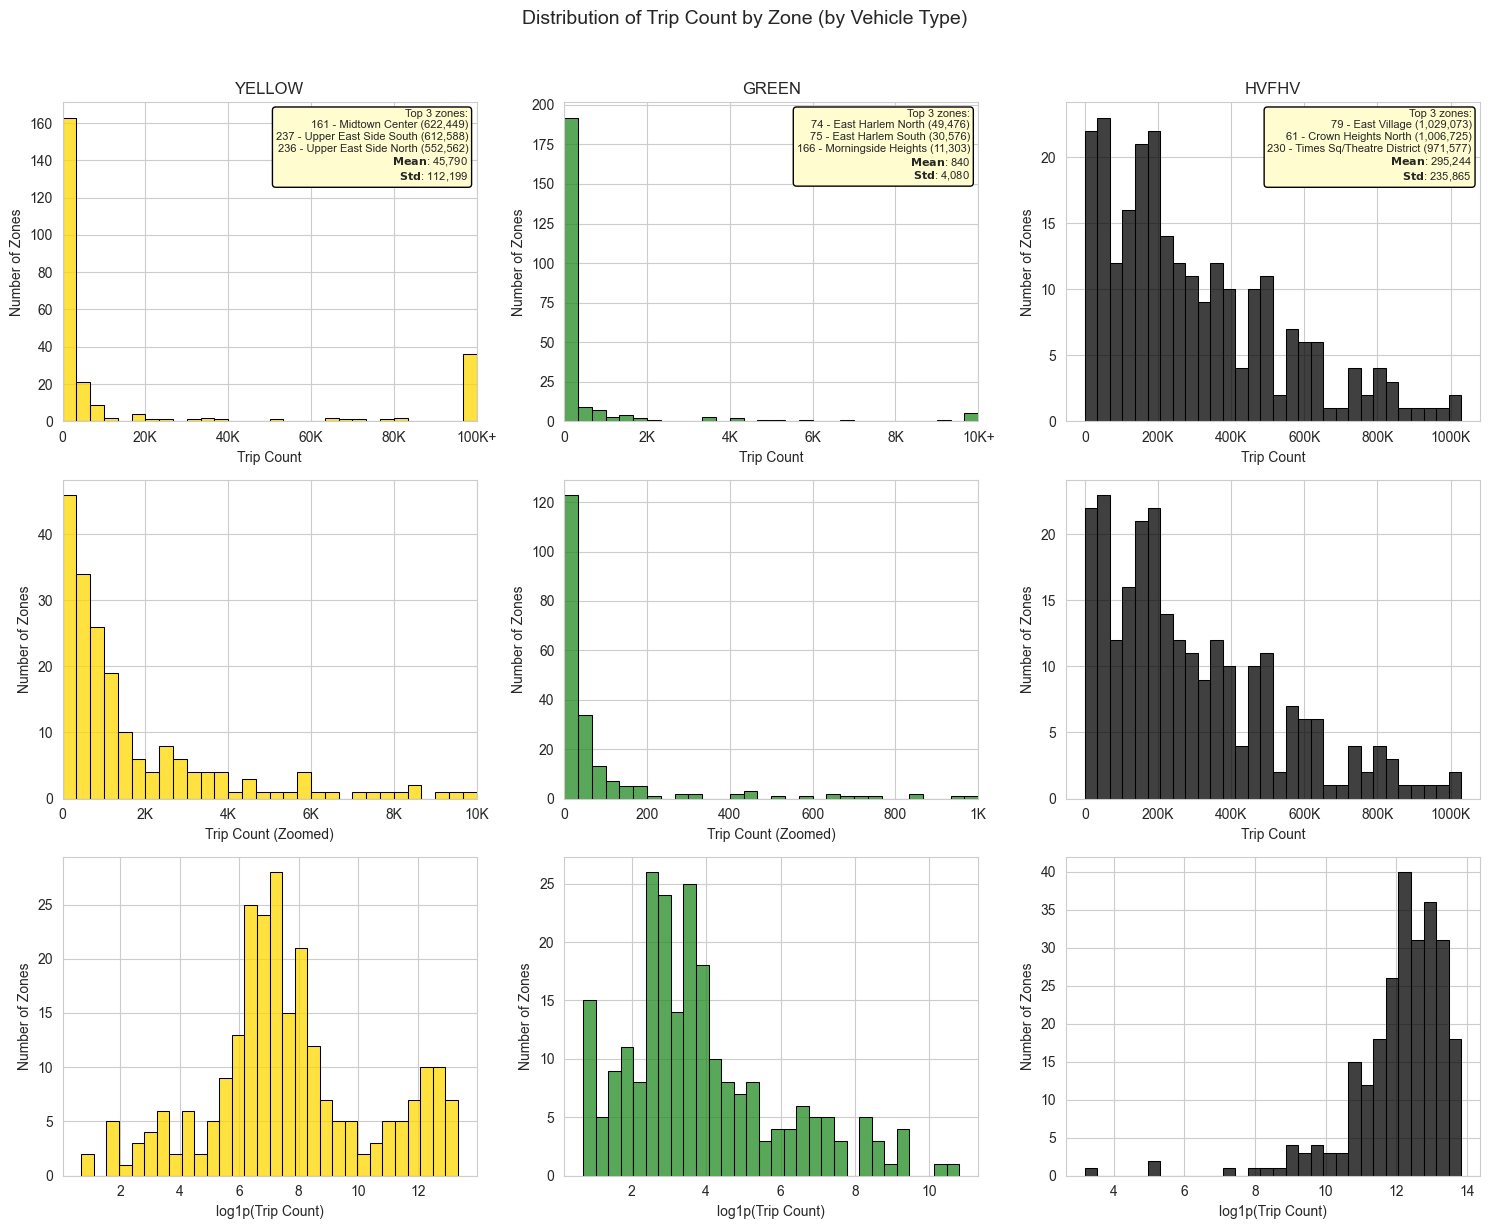

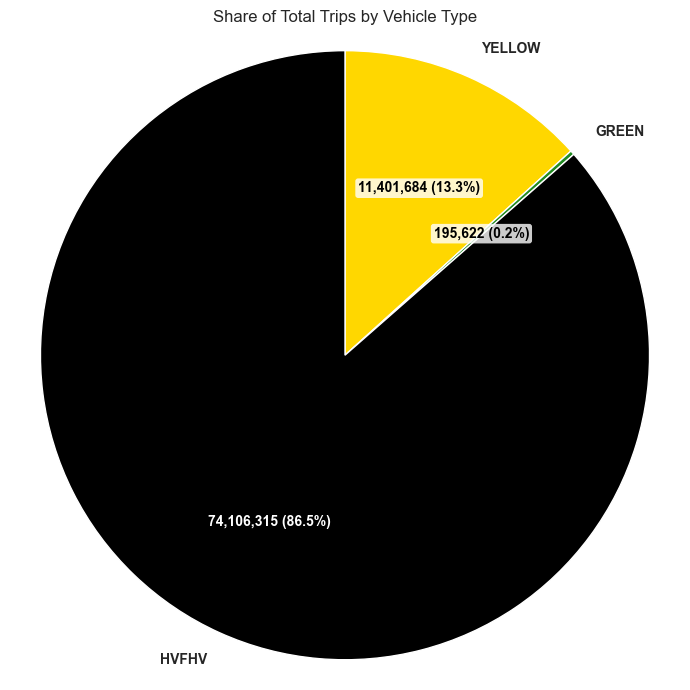

In [5]:
# 1. Histogram of trip_count by zone, one for each vehicle_type
vehicle_types = df_aggregated_zone['vehicle_type'].unique()

fig, axes = plt.subplots(3, len(vehicle_types), figsize=(15, 12)) # A 3x3 figure

for i, vtype in enumerate(vehicle_types):
    subset = df_aggregated_zone[df_aggregated_zone['vehicle_type'] == vtype]
    data = subset['trip_count']

    # Row 1: full distribution with thresholds for yellow/green for better visualization
    threshold = None
    if vtype == 'yellow':
        threshold = 100_000
    elif vtype == 'green':
        threshold = 10_000

    plot_data = data
    bins = 30
    if threshold is not None:
        plot_data = data.clip(upper=threshold)
        bins = np.linspace(0, threshold, 31)

    sns.histplot(plot_data, bins=bins, ax=axes[0, i], color=VEHICLE_COLORS[vtype], edgecolor='black')
    axes[0, i].set_title(f'{vtype.upper()}')
    axes[0, i].set_xlabel('Trip Count')
    axes[0, i].set_ylabel('Number of Zones')

    if threshold is not None:
        axes[0, i].set_xlim(0, threshold)
        ticks = np.linspace(0, threshold, 6)
        labels = [format_k(t, None) for t in ticks]
        labels[-1] = f"{int(threshold/1_000)}K+"
        axes[0, i].set_xticks(ticks)
        axes[0, i].set_xticklabels(labels)
    else:
        axes[0, i].xaxis.set_major_formatter(FuncFormatter(format_k))

    top3 = subset.nlargest(3, 'trip_count')[['pulocationid', 'zone', 'trip_count']]
    mean_val = data.mean()
    std_val = data.std()
    lines = ["Top 3 zones:"]
    for _, row in top3.iterrows():
        lines.append(f"{int(row['pulocationid'])} - {row['zone']} ({row['trip_count']:,.0f})")
    lines.append(f"$\\bf{{Mean}}$: {mean_val:,.0f}")
    lines.append(f"$\\bf{{Std}}$: {std_val:,.0f}")
    note = "\n".join(lines)
    axes[0, i].text(
        0.98, 0.98, note,
        transform=axes[0, i].transAxes,
        ha='right', va='top', fontsize=8,
        bbox=dict(boxstyle='round,pad=0.3', facecolor='#FFFDD0', edgecolor='black')
    )

    # Row 2: zoomed distributions
    zoom_max = None
    if vtype == 'yellow':
        zoom_max = 10_000
    elif vtype == 'green':
        zoom_max = 1_000

    if zoom_max is not None:
        zoom_data = data[data <= zoom_max]
        zoom_bins = np.linspace(0, zoom_max, 31)
        sns.histplot(zoom_data, bins=zoom_bins, ax=axes[1, i], color=VEHICLE_COLORS[vtype], edgecolor='black')
        axes[1, i].set_xlim(0, zoom_max)
        axes[1, i].xaxis.set_major_formatter(FuncFormatter(format_k))
    else:
        sns.histplot(data, bins=30, ax=axes[1, i], color=VEHICLE_COLORS[vtype], edgecolor='black')
        axes[1, i].xaxis.set_major_formatter(FuncFormatter(format_k))

    if zoom_max is not None:
        axes[1, i].set_xlabel('Trip Count (Zoomed)')
    else:
        axes[1, i].set_xlabel('Trip Count')
    axes[1, i].set_ylabel('Number of Zones')

    # Row 3: log1p transformation
    log_data = np.log1p(data)
    sns.histplot(log_data, bins=30, ax=axes[2, i], color=VEHICLE_COLORS[vtype], edgecolor='black')
    axes[2, i].set_xlabel('log1p(Trip Count)')
    axes[2, i].set_ylabel('Number of Zones')

fig.suptitle('Distribution of Trip Count by Zone (by Vehicle Type)', fontsize=14, y=1.02)
plt.tight_layout()
fig.savefig(FIGURES_DIR / "01_trip_count_histograms.png", dpi=FIGURE_DPI, bbox_inches='tight')
plt.show()

# 1.1 Pie plot of total trips by vehicle type
trip_totals = df_aggregated_zone.groupby('vehicle_type')['trip_count'].sum()
trip_totals = trip_totals.reindex(vehicle_types)

def make_autopct(values):
    def autopct(pct):
        total = np.sum(values)
        count = int(round(pct / 100.0 * total))
        return f"{count:,.0f} ({pct:.1f}%)"
    return autopct

fig, ax = plt.subplots(figsize=(7, 7))
wedges, texts, autotexts = ax.pie(
    trip_totals.values,
    labels=[v.upper() for v in trip_totals.index],
    autopct=make_autopct(trip_totals.values),
    startangle=90,
    counterclock=False,
    colors=[VEHICLE_COLORS[v] for v in trip_totals.index],
    textprops={'fontsize': 10},
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}
)

label_bbox = dict(boxstyle='round,pad=0.2', facecolor='white', edgecolor='none', alpha=0.8)
hvfhv_bbox = dict(boxstyle='round,pad=0.2', facecolor='black', edgecolor='none', alpha=0.6)

for i, v in enumerate(trip_totals.index):
    is_hvfhv = v.lower() == 'hvfhv'
    autotexts[i].set_color('white' if is_hvfhv else 'black')
    autotexts[i].set_fontweight('bold')
    autotexts[i].set_bbox(hvfhv_bbox if is_hvfhv else label_bbox)
    texts[i].set_fontweight('bold')
    texts[i].set_bbox(label_bbox)

ax.set_title('Share of Total Trips by Vehicle Type')
ax.axis('equal')
plt.tight_layout()
fig.savefig(FIGURES_DIR / "01_1_trip_share_pie.png", dpi=FIGURE_DPI, bbox_inches='tight')
plt.show()


**Finding:** HVFHV represented the overwhelming majority of 86.6% of the total trips made in New York for the periods of (January, April, July and October) excluding FHV.
- Most of the trips that were made by yellow taxis are concentrated in a handful of zones (~40)
- Green taxis' contribution is very small (0.2%) 

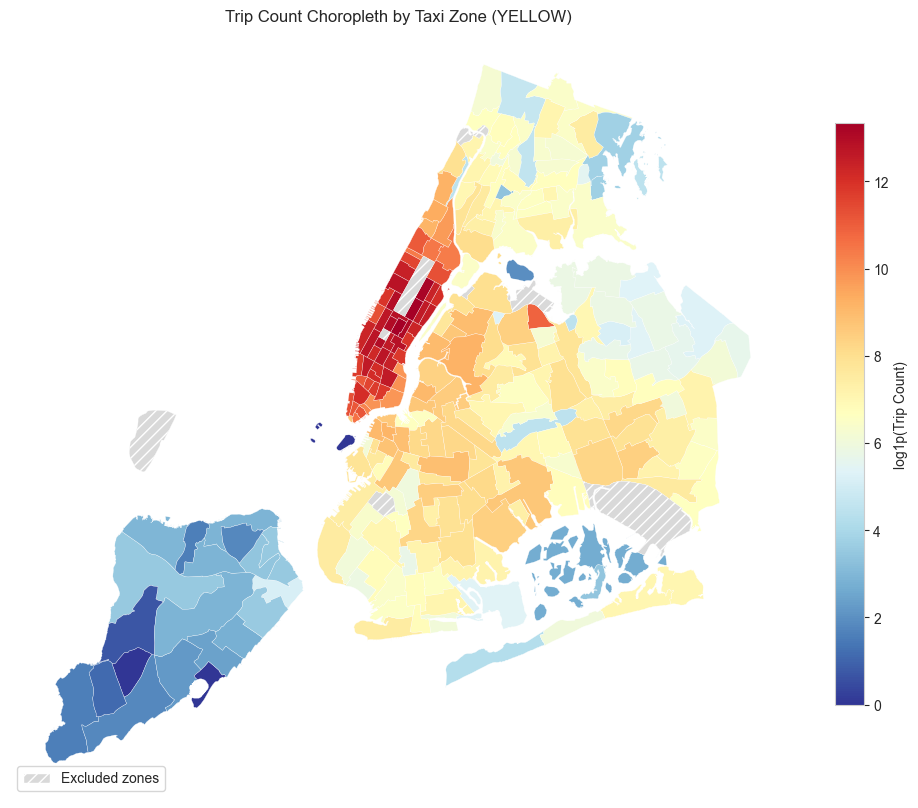

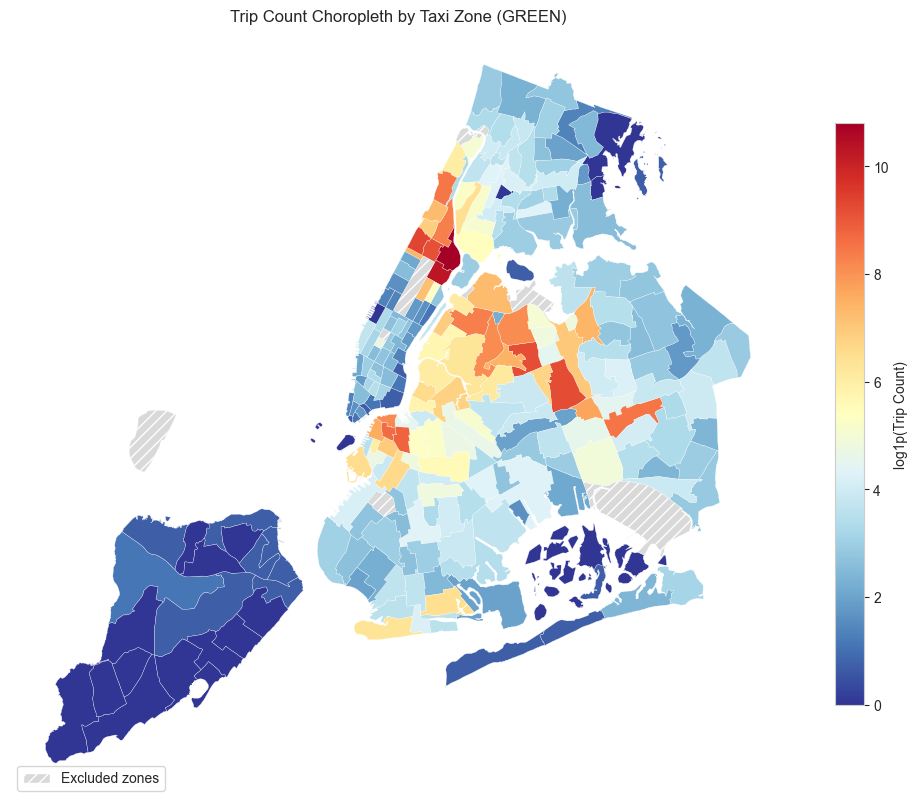

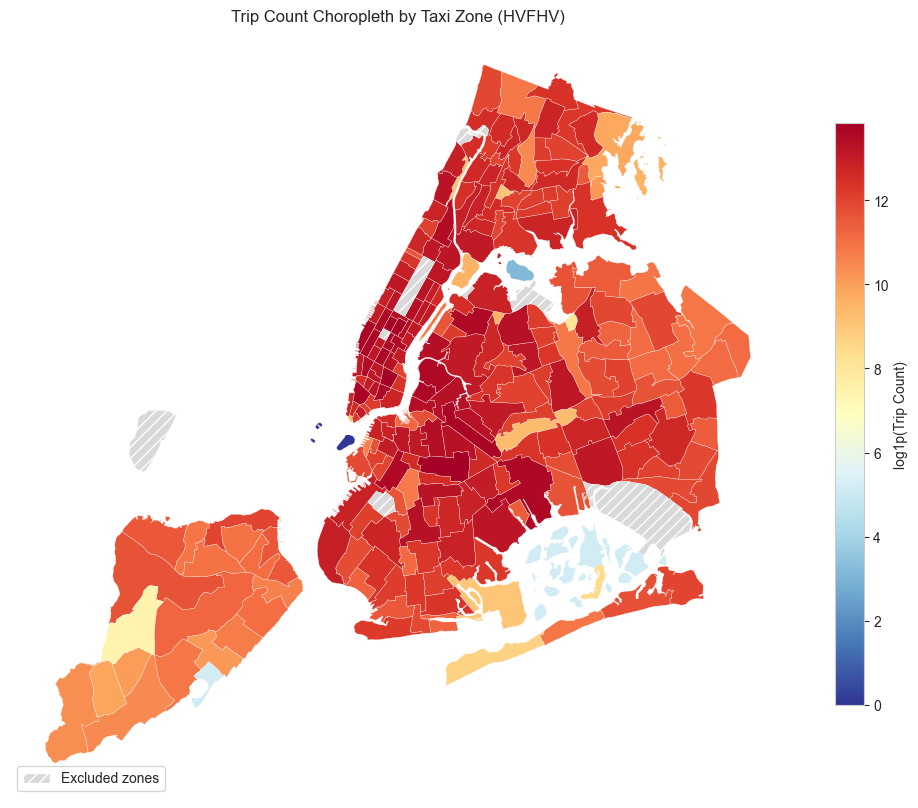

In [6]:
# 2. Choropleth of New York City by vehicle type
TAXI_ZONES_SHP = SHAPEFILE_DIR / "taxi_zones" / "taxi_zones.shp"
gdf_taxi_zones = gpd.read_file(TAXI_ZONES_SHP)
gdf_taxi_zones = gdf_taxi_zones.rename(columns={'LocationID': 'pulocationid'})
gdf_taxi_zones['pulocationid'] = gdf_taxi_zones['pulocationid'].astype(int)

zone_trip_counts = (
    df_aggregated_zone.groupby(['vehicle_type', 'pulocationid'])['trip_count']
    .sum()
    .reset_index()
)

for vtype in vehicle_types:
    zone_counts = zone_trip_counts[zone_trip_counts['vehicle_type'] == vtype]
    gdf_plot = gdf_taxi_zones.merge(zone_counts, on='pulocationid', how='left')
    gdf_plot['trip_count'] = gdf_plot['trip_count'].fillna(0)
    gdf_plot['trip_count_log1p'] = np.log1p(gdf_plot['trip_count'])

    plot_choropleth_with_exclusions(
        gdf_plot,
        column='trip_count_log1p',
        title=f'Trip Count Choropleth by Taxi Zone ({vtype.upper()})',
        legend_label='log1p(Trip Count)',
        filename=FIGURES_DIR / f"02_trip_count_choropleth_{vtype}.png",
        excluded_ids=EXCLUDED_ZONES
    )


**Finding:** 
- The volume that yellow taxis have is primarily concentrated in Manhattan and a lesser part in Queens
- The main volume of green taxis is located around manhattan and queens
- Given that both yellow taxis and green taxis have little to no presence on the outer boroughs (the focus of my analysis) which are overwhelmingly dominated by HVFHV, I will only focus on the latter from now on 

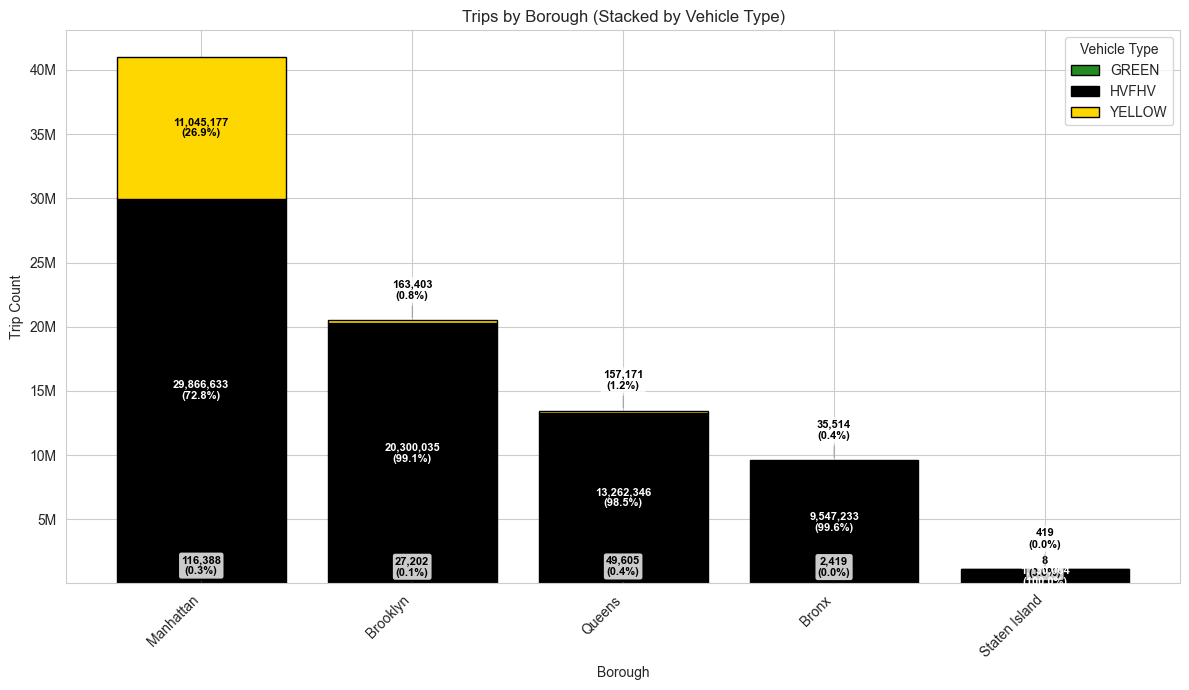

In [7]:
# 3. Stacked bar chart of trips by borough with vehicle type breakdown
# Aggregate trips by borough and vehicle type
borough_vehicle = df_aggregated_zone.groupby(['borough', 'vehicle_type'])['trip_count'].sum().unstack(fill_value=0)

# Calculate percentages
borough_totals = borough_vehicle.sum(axis=1)
borough_pct = borough_vehicle.div(borough_totals, axis=0) * 100

# Sort by total trips descending
borough_vehicle = borough_vehicle.loc[borough_totals.sort_values(ascending=False).index]
borough_pct = borough_pct.loc[borough_totals.sort_values(ascending=False).index]

# Plot
fig, ax = plt.subplots(figsize=(12, 7))

bottom = np.zeros(len(borough_vehicle))
small_label_offsets = np.zeros(len(borough_vehicle))
min_pct_label = 5

for col in borough_vehicle.columns:
    values = borough_vehicle[col].values
    pcts = borough_pct[col].values
    bars = ax.bar(borough_vehicle.index, values, bottom=bottom, label=col.upper(), 
                  color=VEHICLE_COLORS[col], edgecolor='black')
    
    # Add labels (count and percentage)
    for j, (bar, val, pct) in enumerate(zip(bars, values, pcts)):
        if val > 0:
            height = bar.get_height()
            label = f'{val:,.0f}\n({pct:.1f}%)'
            if pct >= min_pct_label:
                text_color = 'white' if col.lower() == 'hvfhv' else 'black'
                ax.text(bar.get_x() + bar.get_width()/2, bottom[j] + height/2,
                       label,
                       ha='center', va='center', fontsize=8, fontweight='bold', color=text_color)
            else:
                offset = 4 + small_label_offsets[j] * 10
                ax.annotate(label,
                           xy=(bar.get_x() + bar.get_width()/2, bottom[j] + height),
                           xytext=(0, offset),
                           textcoords='offset points',
                           ha='center', va='bottom', fontsize=8, fontweight='bold', color='black',
                           bbox=dict(boxstyle='round,pad=0.2', facecolor='white', edgecolor='none', alpha=0.8),
                           arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))
                small_label_offsets[j] += 1
    
    bottom += values

ax.set_xlabel('Borough')
ax.set_ylabel('Trip Count')
ax.yaxis.set_major_formatter(FuncFormatter(format_m))
ax.set_title('Trips by Borough (Stacked by Vehicle Type)')
ax.legend(title='Vehicle Type', loc='upper right')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
fig.savefig(FIGURES_DIR / "03_trips_by_borough_stacked.png", dpi=FIGURE_DPI, bbox_inches='tight')
plt.show()


**Finding:** As expected, 97% of yellow taxi's trips were made in Manhattan, whereas in the other boroughs its presence is practically negligible
- HVFHV presence dominates in all boroughs (98%+) except manhattan where yellow taxis have their strongest and basically only presence.

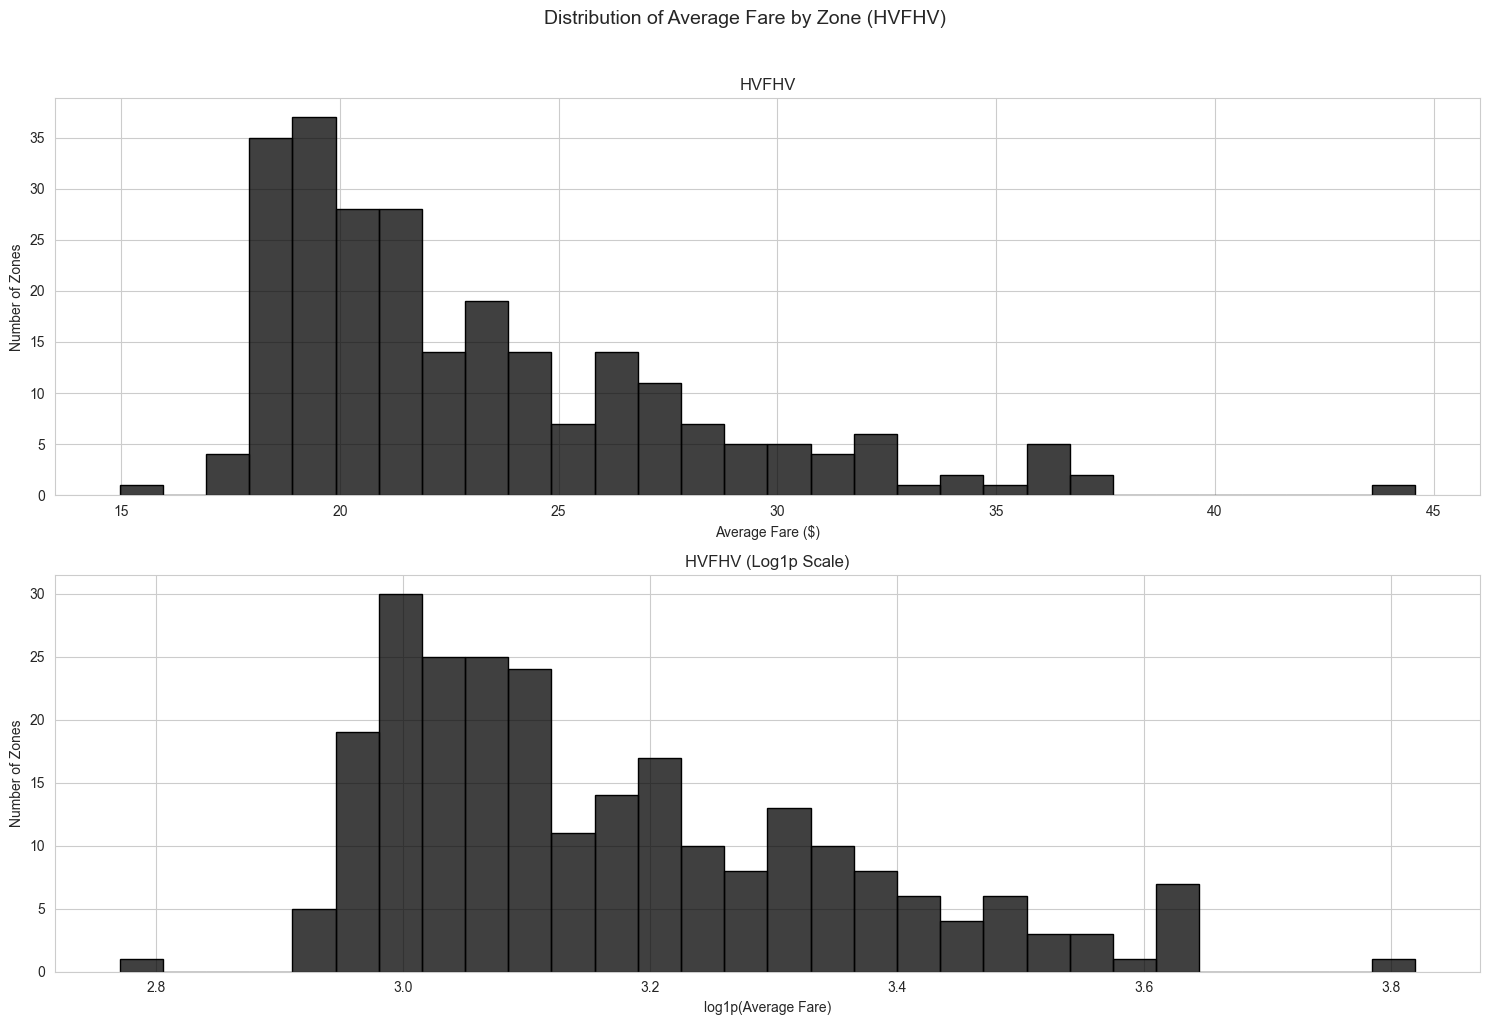

In [8]:
# 4. Histogram of avg_fare by zone (and log1p of avg_fare) for HVFHV only
# 2 rows x 1 col: top row = avg_fare, bottom row = log1p(avg_fare)
hvfhv_type = "hvfhv"
data = df_aggregated_zone[df_aggregated_zone['vehicle_type'] == hvfhv_type]['avg_fare']

fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Top row: avg_fare
sns.histplot(data, bins=30, ax=axes[0], color=VEHICLE_COLORS[hvfhv_type], edgecolor='black')
axes[0].set_title(hvfhv_type.upper())
axes[0].set_xlabel('Average Fare ($)')
axes[0].set_ylabel('Number of Zones')

# Bottom row: log1p(avg_fare)
log_data = np.log1p(data)
sns.histplot(log_data, bins=30, ax=axes[1], color=VEHICLE_COLORS[hvfhv_type], edgecolor='black')
axes[1].set_title(f'{hvfhv_type.upper()} (Log1p Scale)')
axes[1].set_xlabel('log1p(Average Fare)')
axes[1].set_ylabel('Number of Zones')

fig.suptitle('Distribution of Average Fare by Zone (HVFHV)', fontsize=14, y=1.02)
plt.tight_layout()
fig.savefig(FIGURES_DIR / "04_avg_fare_histograms_hvfhv.png", dpi=FIGURE_DPI, bbox_inches='tight')
plt.show()


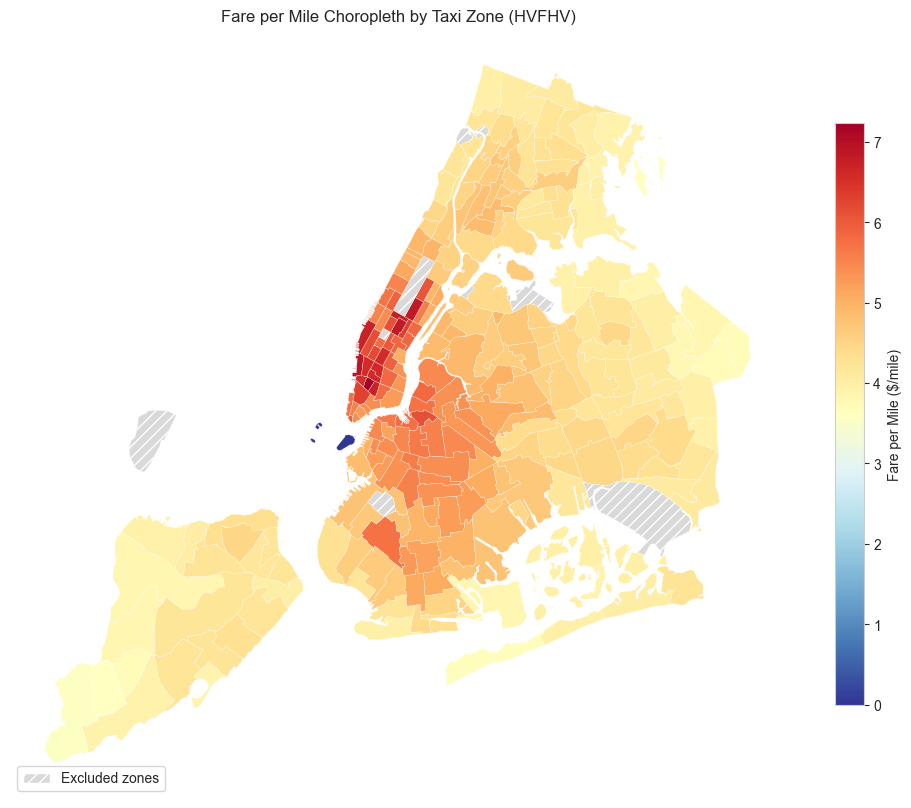

In [9]:
# 5. Choropleth of Fare per Mile by New York City taxi zone (HVFHV only)
if 'gdf_taxi_zones' not in globals():
    TAXI_ZONES_SHP = SHAPEFILE_DIR / "taxi_zones" / "taxi_zones.shp"
    gdf_taxi_zones = gpd.read_file(TAXI_ZONES_SHP)
    gdf_taxi_zones = gdf_taxi_zones.rename(columns={'LocationID': 'pulocationid'})
    gdf_taxi_zones['pulocationid'] = gdf_taxi_zones['pulocationid'].astype(int)

hvfhv_type = "hvfhv"
zone_fare_per_mile = (
    df_aggregated_zone[df_aggregated_zone['vehicle_type'] == hvfhv_type]
    .groupby('pulocationid')['fare_per_mile']
    .mean()
    .reset_index()
)

gdf_plot = gdf_taxi_zones.merge(zone_fare_per_mile, on='pulocationid', how='left')
gdf_plot['fare_per_mile'] = gdf_plot['fare_per_mile'].fillna(0)

plot_choropleth_with_exclusions(
    gdf_plot,
    column='fare_per_mile',
    title='Fare per Mile Choropleth by Taxi Zone (HVFHV)',
    legend_label='Fare per Mile ($/mile)',
    filename=FIGURES_DIR / "05_fare_per_mile_choropleth_hvfhv.png",
    excluded_ids=EXCLUDED_ZONES
)


**Finding:** The outer boroughs get a lower fare per mile

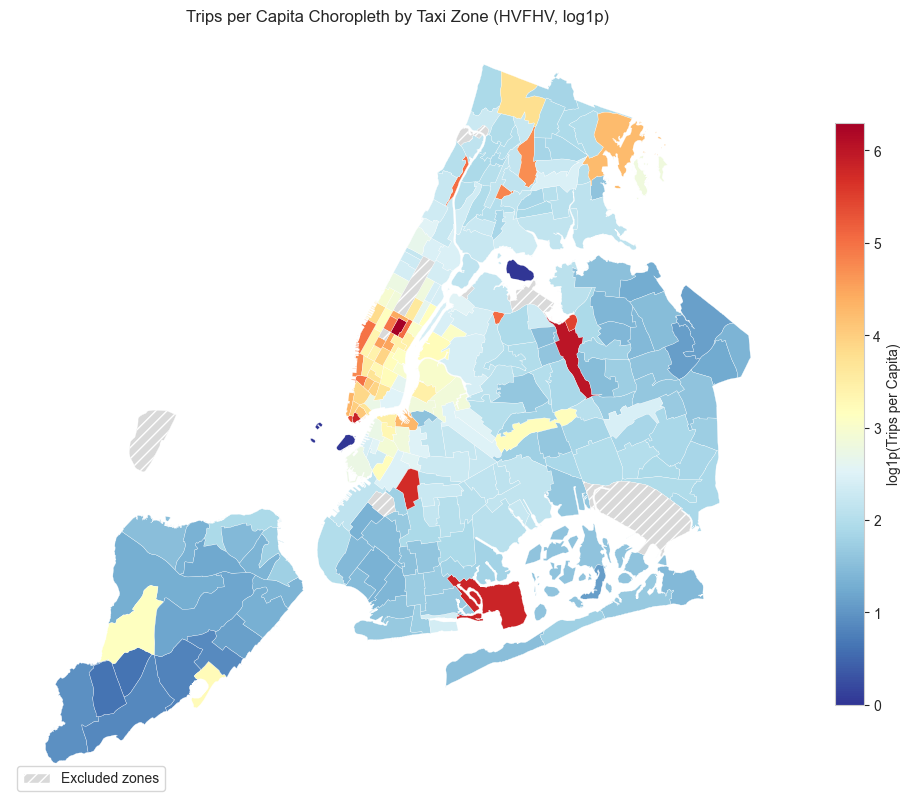

In [10]:
# 6. Choropleth of Trips per Capita by New York City taxi zone (HVFHV only)
if 'gdf_taxi_zones' not in globals():
    TAXI_ZONES_SHP = SHAPEFILE_DIR / "taxi_zones" / "taxi_zones.shp"
    gdf_taxi_zones = gpd.read_file(TAXI_ZONES_SHP)
    gdf_taxi_zones = gdf_taxi_zones.rename(columns={'LocationID': 'pulocationid'})
    gdf_taxi_zones['pulocationid'] = gdf_taxi_zones['pulocationid'].astype(int)

hvfhv_type = "hvfhv"
zone_trips_per_capita = (
    df_aggregated_zone[df_aggregated_zone['vehicle_type'] == hvfhv_type]
    .groupby('pulocationid')['trips_per_capita']
    .mean()
    .reset_index()
)

gdf_plot = gdf_taxi_zones.merge(zone_trips_per_capita, on='pulocationid', how='left')
gdf_plot['trips_per_capita'] = gdf_plot['trips_per_capita'].fillna(0)
gdf_plot['trips_per_capita_log1p'] = np.log1p(gdf_plot['trips_per_capita'])

plot_choropleth_with_exclusions(
    gdf_plot,
    column='trips_per_capita_log1p',
    title='Trips per Capita Choropleth by Taxi Zone (HVFHV, log1p)',
    legend_label='log1p(Trips per Capita)',
    filename=FIGURES_DIR / "06_trips_per_capita_choropleth_hvfhv_log1p.png",
    excluded_ids=EXCLUDED_ZONES
)


**Finding:** It does kind of look that the outermost zones tend to be lower on average than inner zones

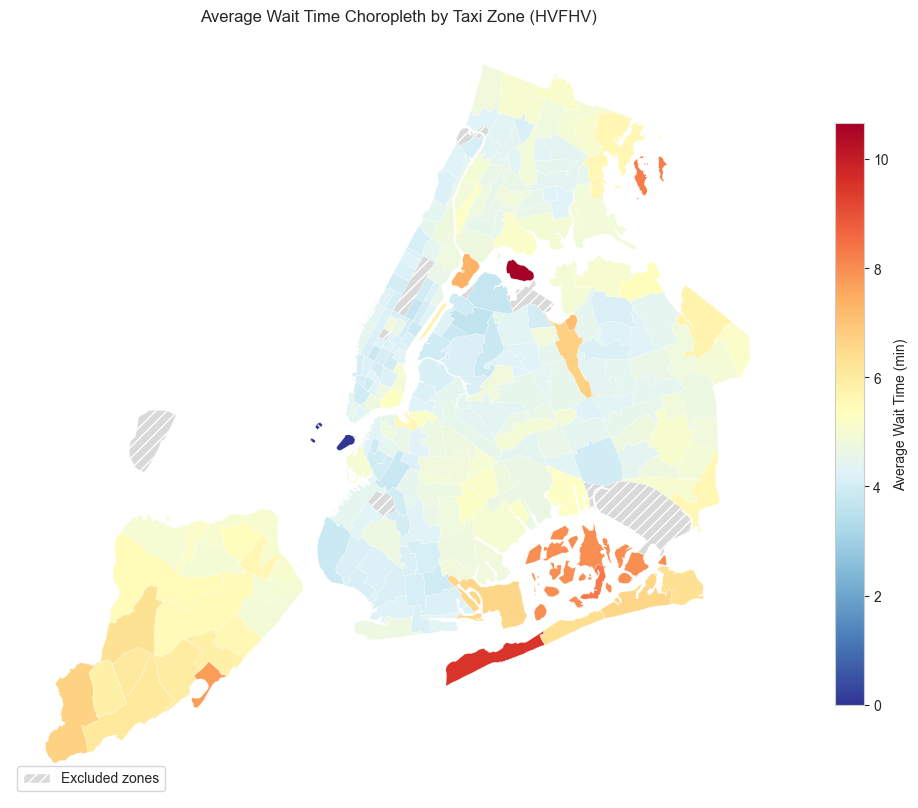

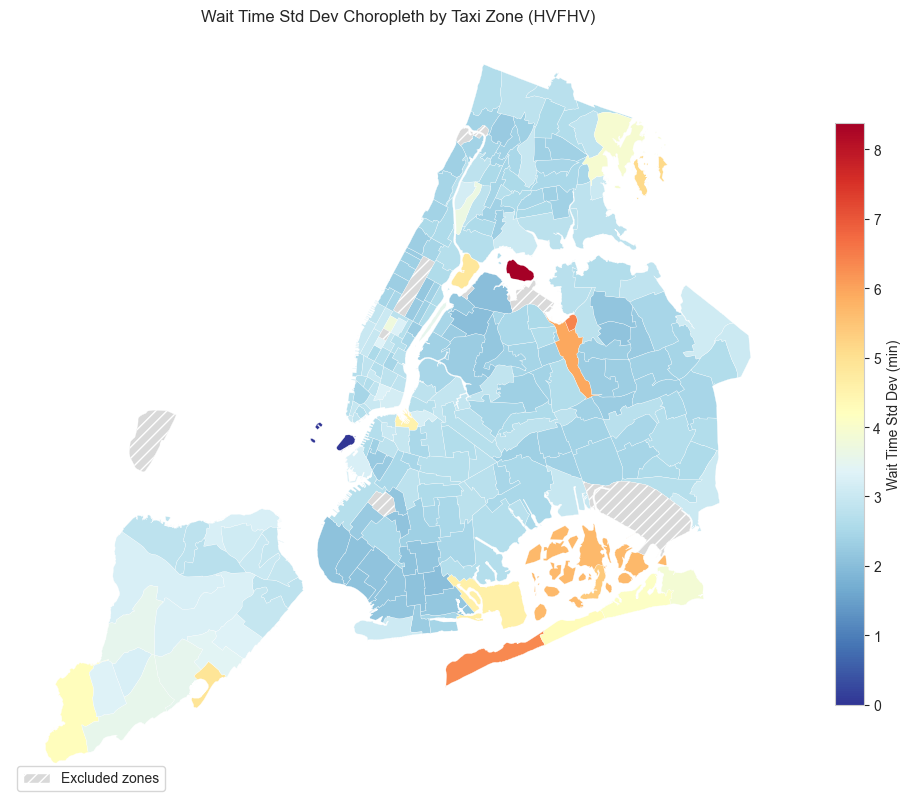

In [11]:
# 7. Choropleth of Wait Time by New York City taxi zone (HVFHV only)
if 'gdf_taxi_zones' not in globals():
    TAXI_ZONES_SHP = SHAPEFILE_DIR / "taxi_zones" / "taxi_zones.shp"
    gdf_taxi_zones = gpd.read_file(TAXI_ZONES_SHP)
    gdf_taxi_zones = gdf_taxi_zones.rename(columns={'LocationID': 'pulocationid'})
    gdf_taxi_zones['pulocationid'] = gdf_taxi_zones['pulocationid'].astype(int)

hvfhv_type = "hvfhv"
zone_wait = (
    df_aggregated_zone[df_aggregated_zone['vehicle_type'] == hvfhv_type]
    .groupby('pulocationid')[['avg_wait_time', 'std_wait_time']]
    .mean()
    .reset_index()
)

gdf_plot = gdf_taxi_zones.merge(zone_wait, on='pulocationid', how='left')
gdf_plot['avg_wait_time'] = gdf_plot['avg_wait_time'].fillna(0)
gdf_plot['std_wait_time'] = gdf_plot['std_wait_time'].fillna(0)

plot_choropleth_with_exclusions(
    gdf_plot,
    column='avg_wait_time',
    title='Average Wait Time Choropleth by Taxi Zone (HVFHV)',
    legend_label='Average Wait Time (min)',
    filename=FIGURES_DIR / "07_avg_wait_time_choropleth_hvfhv.png",
    excluded_ids=EXCLUDED_ZONES
)

plot_choropleth_with_exclusions(
    gdf_plot,
    column='std_wait_time',
    title='Wait Time Std Dev Choropleth by Taxi Zone (HVFHV)',
    legend_label='Wait Time Std Dev (min)',
    filename=FIGURES_DIR / "07_std_wait_time_choropleth_hvfhv.png",
    excluded_ids=EXCLUDED_ZONES
)


**Finding:** Looking at the avg_time Choropleth, outer borough zones to seem to have a longer wait time

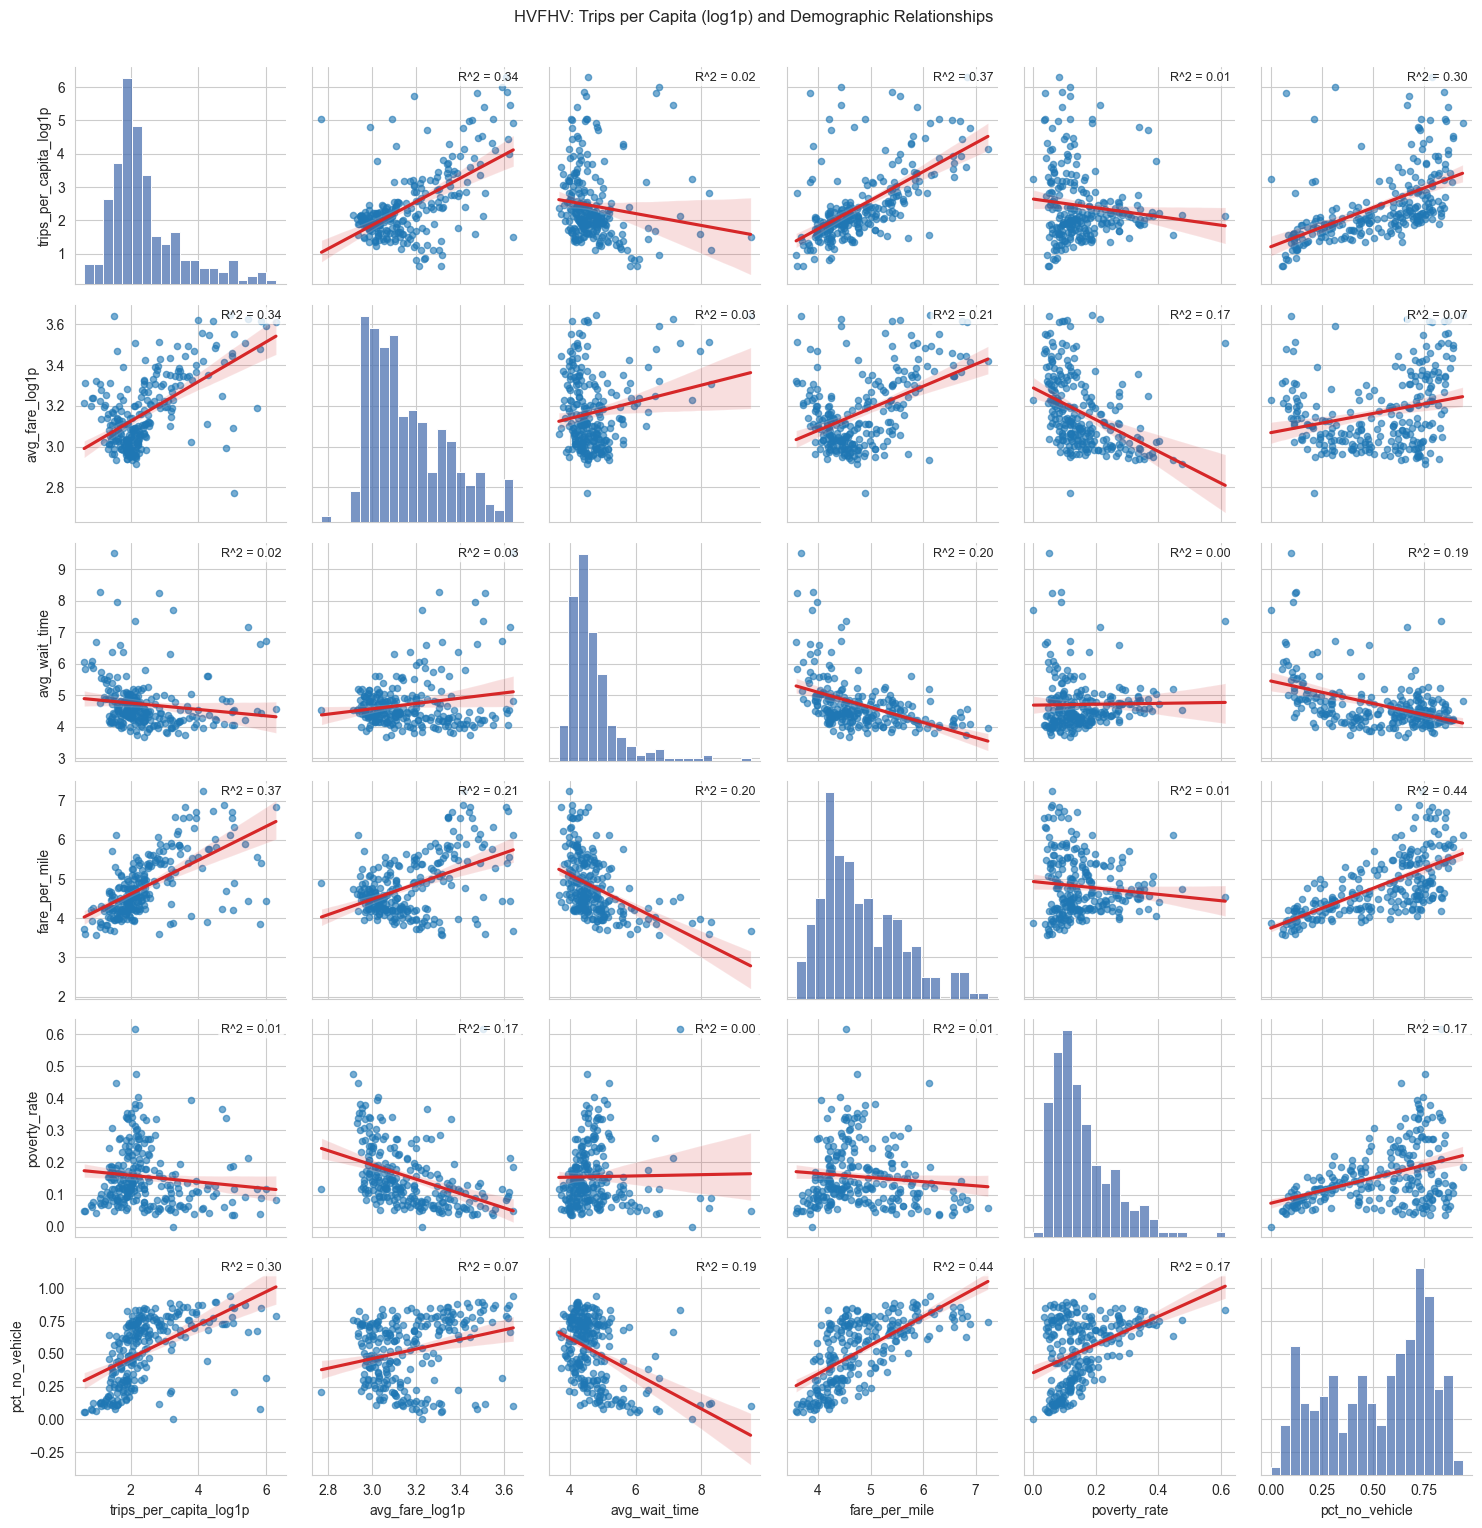

In [12]:
# 8. Pair plot of key demographic metrics (HVFHV only)
hvfhv_type = "hvfhv"

pair_df = df_aggregated_zone[df_aggregated_zone['vehicle_type'] == hvfhv_type].copy()
pair_df['trips_per_capita_log1p'] = np.log1p(pair_df['trips_per_capita'])
pair_df['avg_fare_log1p'] = np.log1p(pair_df['avg_fare'])

pair_vars = [
    'trips_per_capita_log1p',
    'avg_fare_log1p',
    'avg_wait_time',
    'fare_per_mile',
    'poverty_rate',
    'pct_no_vehicle',
]

pair_df = pair_df[pair_vars].dropna()

# Regression plots with R^2 annotations

def regplot_with_r2(x, y, **kwargs):
    ax = plt.gca()
    sns.regplot(x=x, y=y, ax=ax, scatter_kws={'s': 20, 'alpha': 0.6}, line_kws={'color': '#d62728'})
    if len(x) > 1:
        r = np.corrcoef(x, y)[0, 1]
        r2 = r * r
        ax.text(
            0.98, 0.98, f"R^2 = {r2:.2f}",
            transform=ax.transAxes, ha='right', va='top', fontsize=9,
            bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.8, edgecolor='none')
        )


g = sns.PairGrid(pair_df, diag_sharey=False)
g.map_lower(regplot_with_r2)
g.map_upper(regplot_with_r2)
g.map_diag(sns.histplot, bins=20, color='#4C72B0', edgecolor='white')

g.fig.suptitle('HVFHV: Trips per Capita (log1p) and Demographic Relationships', y=1.02)
g.fig.savefig(FIGURES_DIR / "07_pairplot_hvfhv_demographics_log1p.png", dpi=FIGURE_DPI, bbox_inches='tight')
plt.show()


**Finding:** There is no bivariate relationship that supports the hypothesis that lower income areas have a service inequity gap (no longer wait times, higher fare per mile or trips per capita)

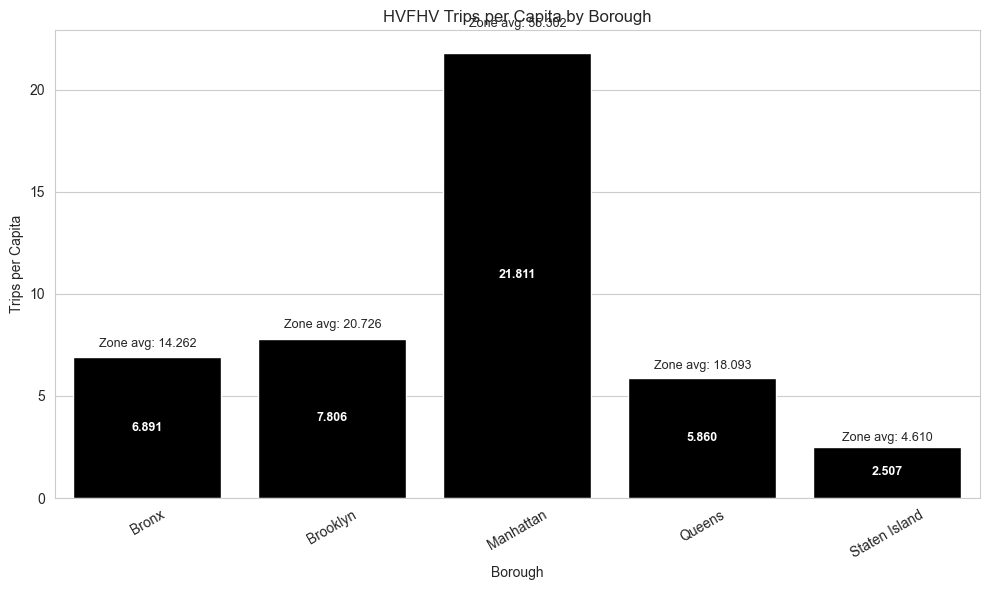

In [13]:
# 9. Trips per Capita by Borough (HVFHV only)
hvfhv_type = "hvfhv"

borough_trips = (
    df_aggregated_zone[df_aggregated_zone['vehicle_type'] == hvfhv_type]
    .groupby('borough')
    .agg(total_trips=('trip_count', 'sum'), total_population=('total_population', 'sum'))
    .reset_index()
)

borough_trips['trips_per_capita'] = borough_trips['total_trips'] / borough_trips['total_population']

borough_zone_avg = (
    df_aggregated_zone[df_aggregated_zone['vehicle_type'] == hvfhv_type]
    .groupby('borough')['trips_per_capita']
    .mean()
)

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(
    data=borough_trips,
    x='borough',
    y='trips_per_capita',
    color=VEHICLE_COLORS[hvfhv_type],
    ax=ax
)
ax.set_title('HVFHV Trips per Capita by Borough')
ax.set_xlabel('Borough')
ax.set_ylabel('Trips per Capita')
ax.tick_params(axis='x', rotation=30)

# White value labels inside bars and zone-average notes above each bar
for bar, borough in zip(ax.patches, borough_trips['borough']):
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    ax.text(
        x, height * 0.5, f"{height:.3f}",
        ha='center', va='center', color='white', fontsize=9, fontweight='bold'
    )
    zone_avg = borough_zone_avg.loc[borough]
    ax.text(
        x, height * 1.05, f"Zone avg: {zone_avg:.3f}",
        ha='center', va='bottom', fontsize=9
    )

plt.tight_layout()
fig.savefig(FIGURES_DIR / "08_trips_per_capita_by_borough_hvfhv.png", dpi=FIGURE_DPI, bbox_inches='tight')
plt.show()


## Aggregating by Zone, Hour and is_weekend flag

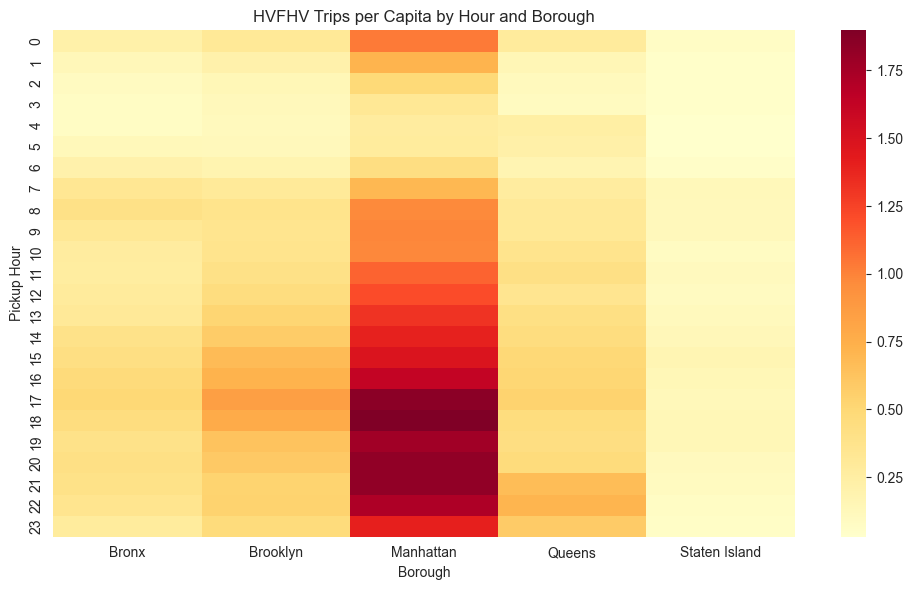

In [14]:
# 10. Hourly Trips per Capita Heatmap by Borough (HVFHV only)
hvfhv_type = "hvfhv"

df_hourly = df_aggregated[df_aggregated['vehicle_type'] == hvfhv_type].copy()
df_hourly['poverty_bin'] = pd.cut(
    df_hourly['poverty_rate'],
    bins=[0, 0.1, 0.2, 0.3, 0.4, 1.0],
    labels=['<10%', '10-20%', '20-30%', '30-40%', '>40%']
)

heatmap_data = (
    df_hourly.groupby(['pickup_hour', 'borough'])['trips_per_capita']
    .mean()
    .unstack()
)

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='YlOrRd', ax=ax)
ax.set_title('HVFHV Trips per Capita by Hour and Borough')
ax.set_xlabel('Borough')
ax.set_ylabel('Pickup Hour')
plt.tight_layout()
fig.savefig(FIGURES_DIR / "09_hourly_trips_per_capita_heatmap_hvfhv.png", dpi=FIGURE_DPI, bbox_inches='tight')
plt.show()


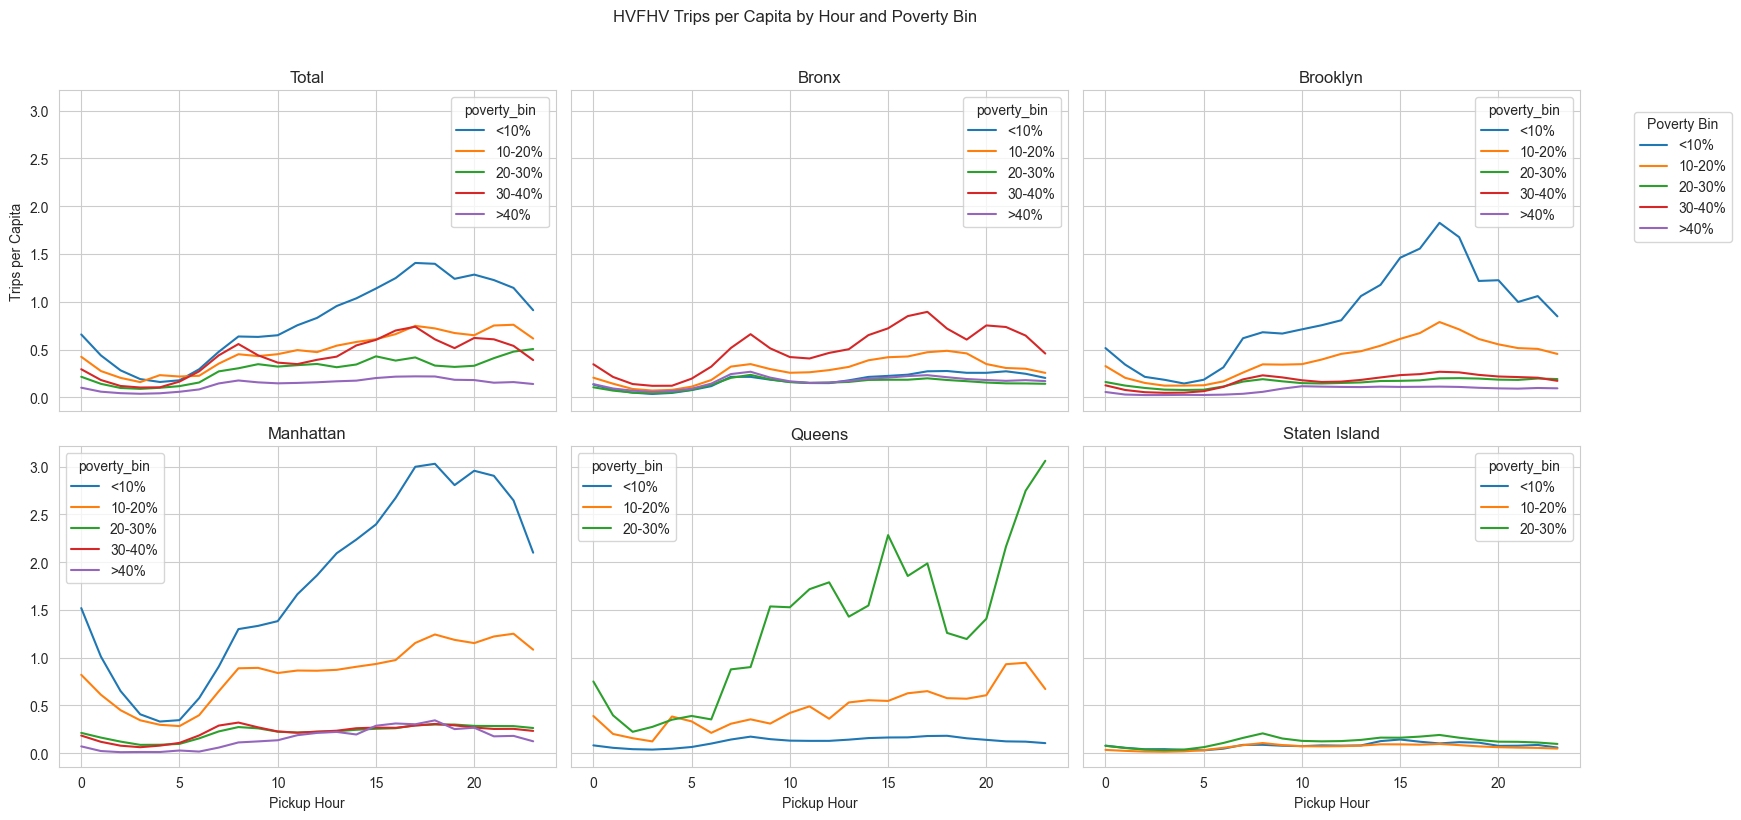

In [15]:
# 11. Hourly Trips per Capita by Poverty Bin (HVFHV only)
borough_order = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']
available_boroughs = [b for b in borough_order if b in df_hourly['borough'].dropna().unique()]

fig, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=True, sharey=True)
axes = axes.flatten()

# Total
hourly_poverty_total = (
    df_hourly.groupby(['pickup_hour', 'poverty_bin'], observed=True)['trips_per_capita']
    .mean()
    .unstack()
)
hourly_poverty_total.plot(kind='line', ax=axes[0])
axes[0].set_title('Total')
axes[0].set_xlabel('Pickup Hour')
axes[0].set_ylabel('Trips per Capita')

# Per borough
for i, borough in enumerate(available_boroughs, start=1):
    hourly_poverty_b = (
        df_hourly[df_hourly['borough'] == borough]
        .groupby(['pickup_hour', 'poverty_bin'], observed=True)['trips_per_capita']
        .mean()
        .unstack()
    )
    hourly_poverty_b.plot(kind='line', ax=axes[i])
    axes[i].set_title(borough)
    axes[i].set_xlabel('Pickup Hour')

# Hide any unused axes
for j in range(1 + len(available_boroughs), len(axes)):
    axes[j].axis('off')

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Poverty Bin', bbox_to_anchor=(1.02, 0.9), loc='upper left')
fig.suptitle('HVFHV Trips per Capita by Hour and Poverty Bin', y=1.02)
plt.tight_layout()
fig.savefig(FIGURES_DIR / "10_hourly_trips_per_capita_poverty_bin_hvfhv.png", dpi=FIGURE_DPI, bbox_inches='tight')
plt.show()


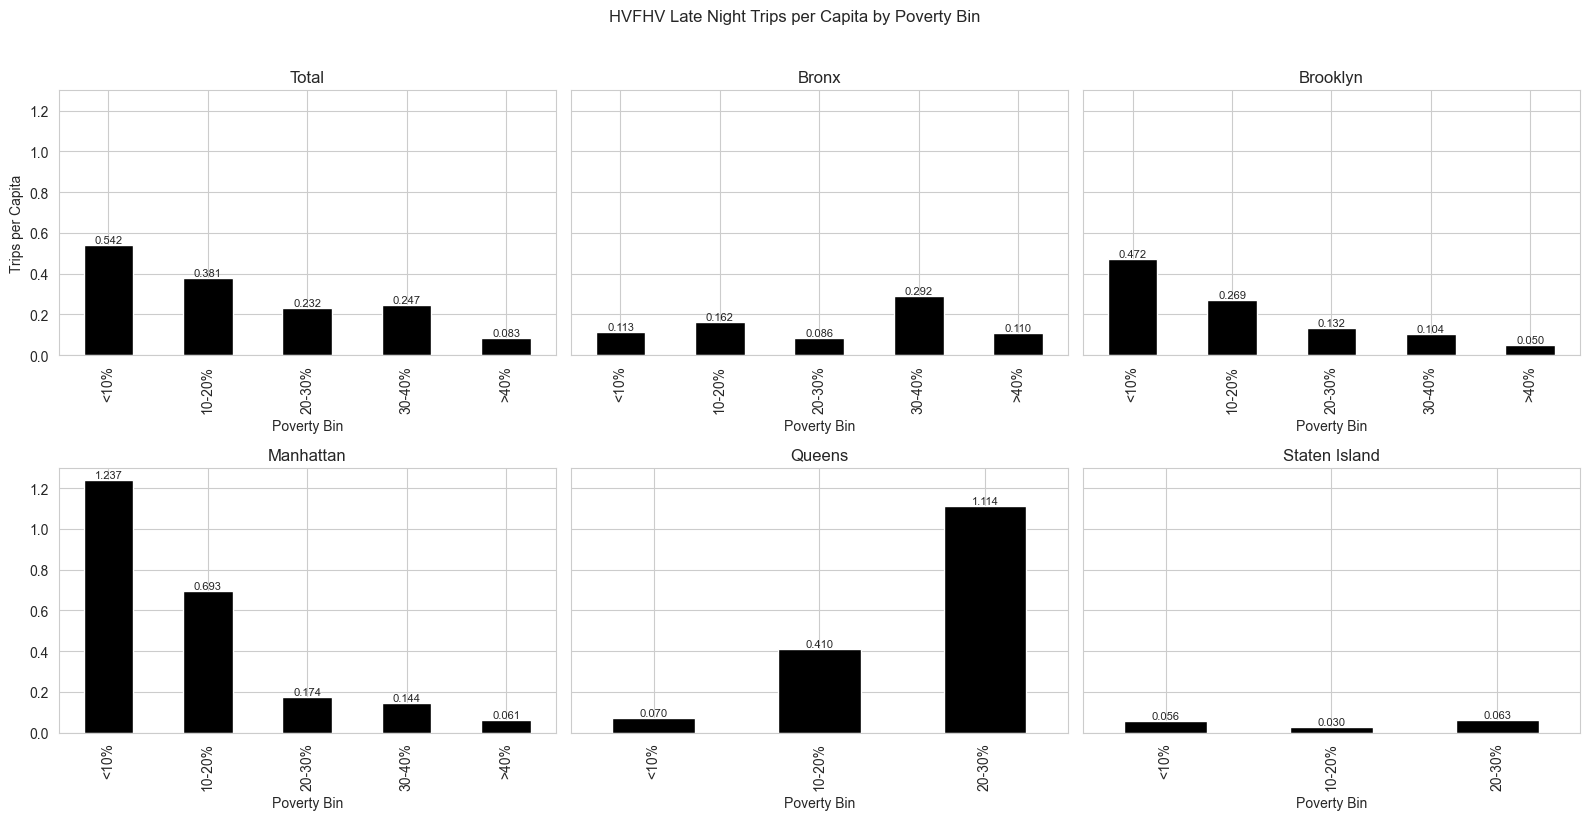

In [16]:
# 12. Late Night Trips per Capita by Poverty Bin (HVFHV only)
late_night = df_hourly[df_hourly['pickup_hour'].isin([22, 23, 0, 1, 2, 3, 4])]

fig, axes = plt.subplots(2, 3, figsize=(16, 8), sharey=True)
axes = axes.flatten()

# Total
late_night_total = late_night.groupby('poverty_bin', observed=True)['trips_per_capita'].mean()
late_night_total.plot(kind='bar', ax=axes[0], color=VEHICLE_COLORS[hvfhv_type])
axes[0].set_title('Total')
axes[0].set_xlabel('Poverty Bin')
axes[0].set_ylabel('Trips per Capita')

# Labels for total
for bar in axes[0].patches:
    height = bar.get_height()
    axes[0].text(
        bar.get_x() + bar.get_width() / 2, height,
        f"{height:.3f}", ha='center', va='bottom', fontsize=8
    )

# Per borough
for i, borough in enumerate(available_boroughs, start=1):
    late_night_b = (
        late_night[late_night['borough'] == borough]
        .groupby('poverty_bin', observed=True)['trips_per_capita']
        .mean()
    )
    late_night_b.plot(kind='bar', ax=axes[i], color=VEHICLE_COLORS[hvfhv_type])
    axes[i].set_title(borough)
    axes[i].set_xlabel('Poverty Bin')

    for bar in axes[i].patches:
        height = bar.get_height()
        axes[i].text(
            bar.get_x() + bar.get_width() / 2, height,
            f"{height:.3f}", ha='center', va='bottom', fontsize=8
        )

# Hide any unused axes
for j in range(1 + len(available_boroughs), len(axes)):
    axes[j].axis('off')

fig.suptitle('HVFHV Late Night Trips per Capita by Poverty Bin', y=1.02)
plt.tight_layout()
fig.savefig(FIGURES_DIR / "11_late_night_trips_per_capita_poverty_bin_hvfhv.png", dpi=FIGURE_DPI, bbox_inches='tight')
plt.show()


**Finding:** Lower income zones tend to take less trips, but this could be by the demand-side which would suggest equity
or the supply side which would suggest inequity